<a href="https://colab.research.google.com/github/lmarcos28/Data-cleaning-and-preprocessing/blob/main/Predicci%C3%B3n_demanda_energ%C3%A9tica_edificio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
from google.colab import files
uploaded = files.upload()


Saving Energy_consumption.csv to Energy_consumption (3).csv


In [50]:
df=pd.read_csv('Energy_consumption.csv')

In [51]:
df.head(3)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888


In [52]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


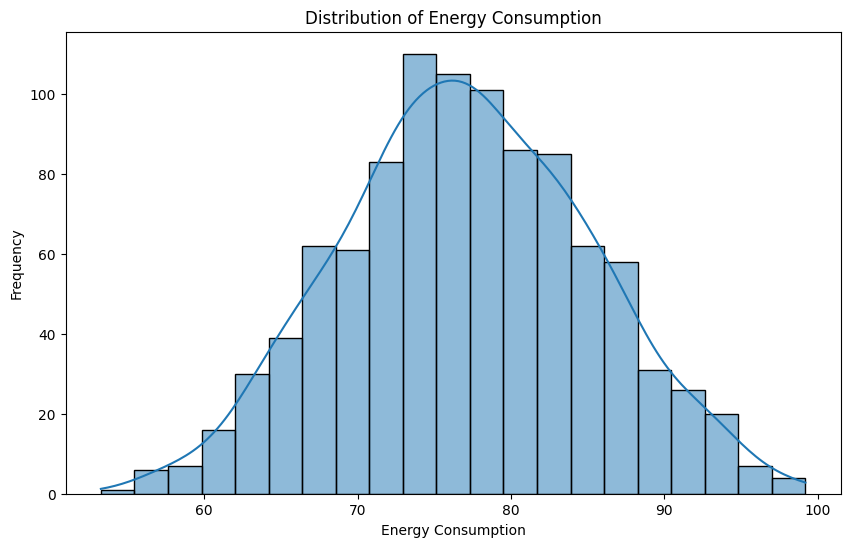

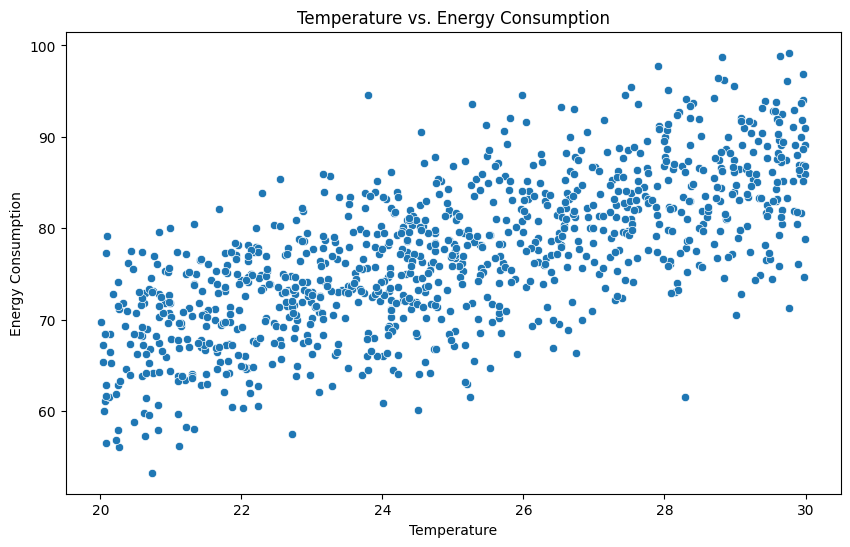

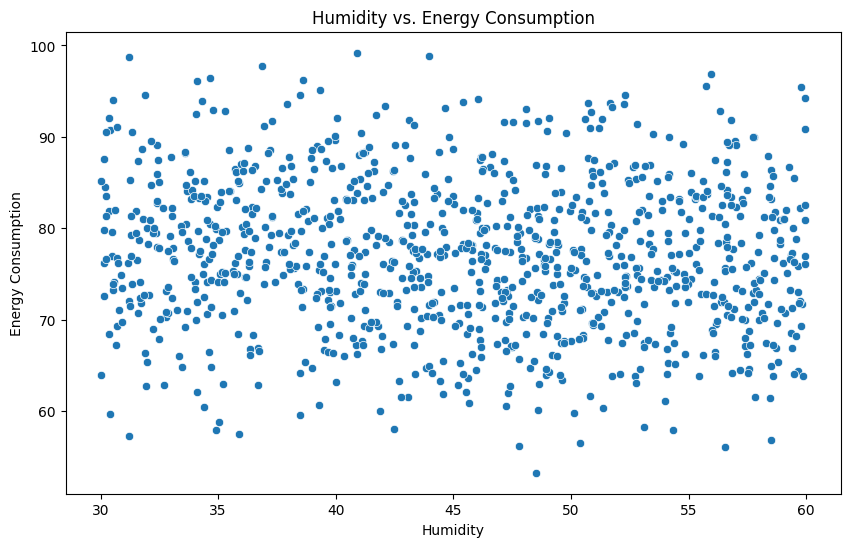

In [53]:
# Visualize the distribution of Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['EnergyConsumption'], kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Temperature and Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=df)
plt.title('Temperature vs. Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.show()

# Visualize the relationship between Humidity and Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='EnergyConsumption', data=df)
plt.title('Humidity vs. Energy Consumption')
plt.xlabel('Humidity')
plt.ylabel('Energy Consumption')
plt.show()

In [54]:
print(df.columns)
df.describe()

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')


,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [35]:
#converting categorical features into numerical
df = pd.get_dummies(data=df)
df.head(10)

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,HVACUsage_Off,HVACUsage_On,LightingUsage_Off,LightingUsage_On,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_No,Holiday_Yes
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,True,True,False,False,True,False,False,False,False,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,True,False,True,False,False,True,False,False,False,False,True,False
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,True,False,True,False,False,False,False,True,False,False,False,True,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,True,False,False,True,False,False,False,False,False,False,True,True,False
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,True,True,False,True,False,False,False,False,False,False,True,False
5,29.576037,36.824263,1871.709180,6,17.626690,84.321885,True,False,True,False,False,False,False,True,False,False,False,False,True
6,25.131167,35.709622,1607.001228,6,24.264702,76.165791,False,True,True,False,True,False,False,False,False,False,False,False,True
7,23.182844,31.679920,1633.955330,8,27.517099,74.131906,True,False,True,False,False,False,False,False,True,False,False,False,True
8,25.391999,46.399364,1240.309224,6,2.307595,78.206236,False,True,True,False,False,False,False,True,False,False,False,True,False
9,22.212549,32.418464,1705.420336,1,29.140071,77.992214,False,True,True,False,False,False,False,False,False,True,False,True,False


**ENTRENAMIENTO DEL MODELO RANDOM FOREST**

In [37]:
#Variables predictoras
X = df[['Temperature','Humidity','SquareFootage','Occupancy','RenewableEnergy',
        'HVACUsage_Off','HVACUsage_On','LightingUsage_Off','LightingUsage_On',
        'DayOfWeek_Friday','DayOfWeek_Monday','DayOfWeek_Saturday','DayOfWeek_Sunday',
        'DayOfWeek_Thursday','DayOfWeek_Tuesday','DayOfWeek_Wednesday',
        'Holiday_No','Holiday_Yes']]

#Variable objetivo
Y = df['EnergyConsumption']

In [55]:
#Separación de datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
#Entrenamiento del modelo

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)


**EVALUACIÓN DEL MODELO**

In [60]:
# Predicciones
y_pred = rf.predict(X_test)

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio (RMSE)
rmse = mse ** 0.5

# Error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 29.98
Root Mean Squared Error (RMSE): 5.48
Mean Absolute Error (MAE): 4.41
R^2 Score: 0.54


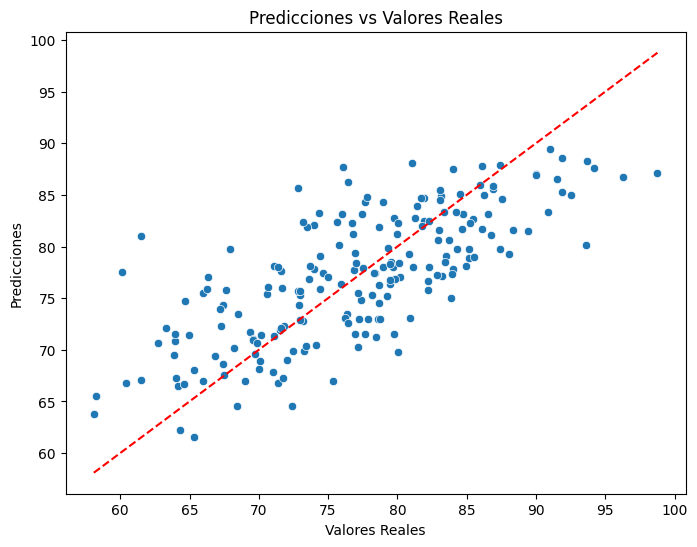

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.show()


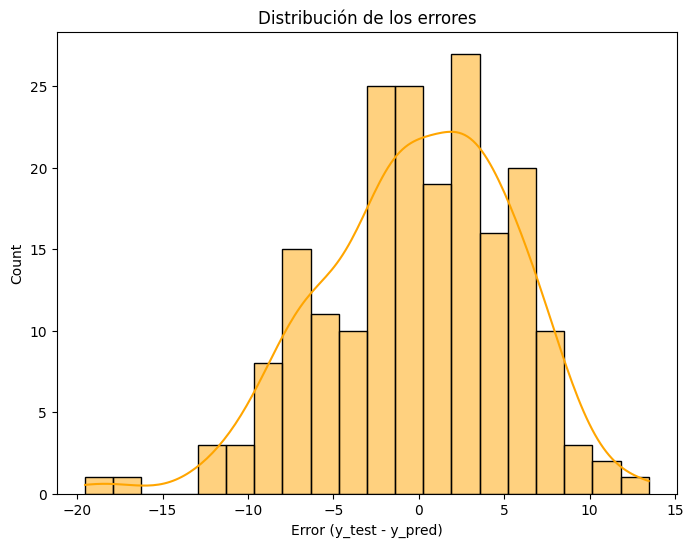

In [62]:
errores = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errores, bins=20, kde=True, color='orange')
plt.xlabel('Error (y_test - y_pred)')
plt.title('Distribución de los errores')
plt.show()
